In [ ]:
# Activity 1

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [33]:
data = pd.read_csv('/content/Car_Speed.csv')

In [34]:
# Step 2.1: Convert 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Step 2.1 A: Filter the data for Day 1 and speeds greater than 40
data = data[(data['day'] == 1) & (data['WAVE-NE-Speed'] > 40)]  # Keep only rows where day is 1 and speed > 40


# Step 2.2: Convert 'Time' to a numeric representation (timestamp in seconds)
data['timestamp'] = data['Time'].astype(int) / 10**9  # Convert to seconds since Unix epoch

# Step 2.3: Remove rows with missing values in 'WAVE-NE-Speed'
data = data.dropna(subset=['WAVE-NE-Speed'])

# Display the first few rows to understand the dataset
data.head()


<ipython-input-34-d3518fb66db0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timestamp'] = data['Time'].astype(int) / 10**9  # Convert to seconds since Unix epoch


,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year,timestamp
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021,1.657411e+09
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021,1.657411e+09
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021,1.657411e+09
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021,1.657411e+09
5,1,2022-07-10 00:05:00,9.0,58.2,3.0,60.8,10,2021,1.657412e+09


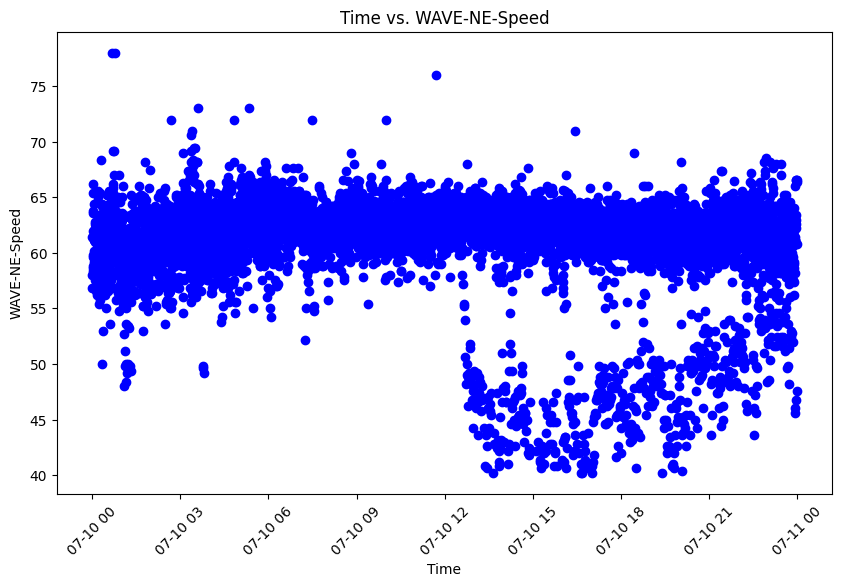

In [35]:
# Step 3: Plot the data points on a scatter plot (time vs. WAVE-NE-Speed)
plt.figure(figsize=(10,6))
plt.scatter(data['Time'], data['WAVE-NE-Speed'], color='blue')
plt.title('Time vs. WAVE-NE-Speed')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Step 4: Split the dataset into training and testing sets
X = data[['timestamp']]  # Features (independent variable: timestamp)
y = data['WAVE-NE-Speed']   # Target (dependent variable: WAVE-NE-Speed)

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Step 5: Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
# Step 6: Use the testing data to evaluate the model’s performance
y_pred = model.predict(X_test)

In [39]:
# Step 7: Calculate evaluation metrics (MAE and RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 2.759807405012958
Root Mean Squared Error (RMSE): 4.307969363206395


In [ ]:
# Activity  3

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Step 2: Load the CSV data
df = pd.read_csv('/content/CrashData.csv')


<ipython-input-4-25b5e953bd5c>:2: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/CrashData.csv')


In [10]:
# Step 3: Display the first few rows of the dataset using df.head()
print("Displaying the first few rows of the dataset:")
print(df.head())

# Step 4: Check for missing values and data types using df.info()
print("\nChecking for missing values and data types:")
print(df.info())

# Step 5: Create summary statistics using df.describe()
print("\nSummary statistics of the dataset:")
print(df.describe())

Displaying the first few rows of the dataset:
   STATE STATENAME  ST_CASE  VEH_NO_x  DAMAGE      DAMAGENAME  PEDS  \
0     19      Iowa   190001         1    11.0  11 Clock Value     0   
1     19      Iowa   190001         1    11.0  11 Clock Value     0   
2     19      Iowa   190001         1    11.0  11 Clock Value     0   
3     19      Iowa   190001         1    11.0  11 Clock Value     0   
4     19      Iowa   190001         1    13.0             Top     0   

   PERNOTMVIT  VE_TOTAL  VE_FORMS_x  ...  DRUGRES3  DRUGRES3NAME  P_SF1  \
0           0         1           1  ...       NaN           NaN    NaN   
1           0         1           1  ...       NaN           NaN    NaN   
2           0         1           1  ...       NaN           NaN    NaN   
3           0         1           1  ...       NaN           NaN    NaN   
4           0         1           1  ...       NaN           NaN    NaN   

   P_SF1NAME P_SF2  P_SF2NAME P_SF3  P_SF3NAME RACE  RACENAME  
0        NaN

In [11]:
df.head()

,STATE,STATENAME,ST_CASE,VEH_NO_x,DAMAGE,DAMAGENAME,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS_x,...,DRUGRES3,DRUGRES3NAME,P_SF1,P_SF1NAME,P_SF2,P_SF2NAME,P_SF3,P_SF3NAME,RACE,RACENAME
0,19,Iowa,190001,1,11.0,11 Clock Value,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,Iowa,190001,1,11.0,11 Clock Value,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,Iowa,190001,1,11.0,11 Clock Value,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,Iowa,190001,1,11.0,11 Clock Value,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,Iowa,190001,1,13.0,Top,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
target_column = 'INJ_SEV'  # Adjust based on the actual column name related to severity


In [13]:
# Selecting relevant columns
features = ['HOUR_x', 'AGE', 'BODY_TYP']  # Adjust based on actual names

# Define X (features) and y (target)
X = df[features]
y = df[target_column]


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Make predictions
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.9147030453355381
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2538
           1       0.96      0.93      0.94       758
           2       0.82      0.83      0.83       705
           3       0.79      0.84      0.81       750
           4       0.92      0.90      0.91      2458
           5       1.00      0.70      0.82        10
           9       0.76      0.82      0.78        38

    accuracy                           0.91      7257
   macro avg       0.89      0.86      0.87      7257
weighted avg       0.92      0.91      0.92      7257



In [ ]:
# Activity 2

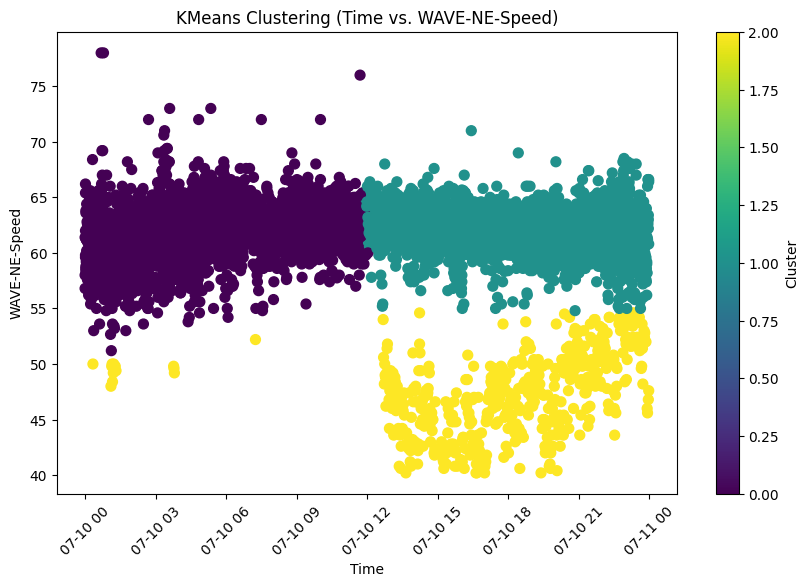

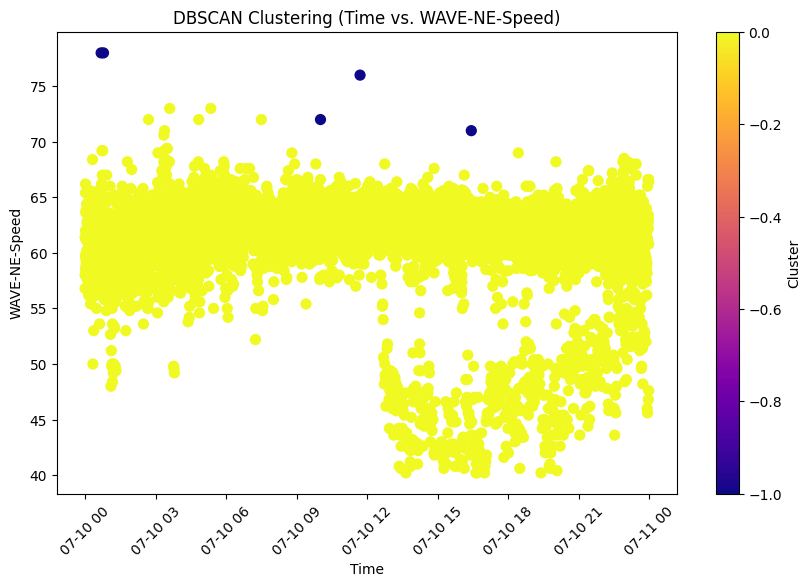

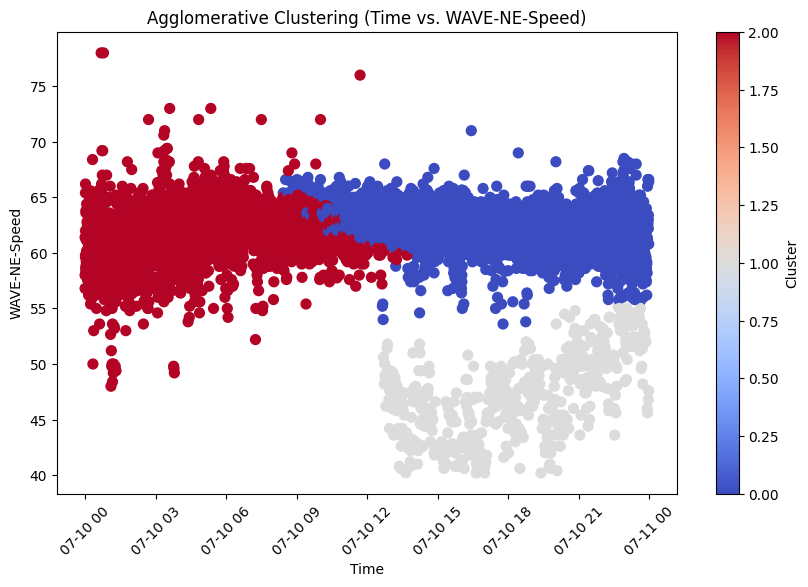

In [60]:
# Load the data
data = pd.read_csv('/content/Car_Speed.csv')

# Step 2.1: Convert 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Step 2.2: Filter the data for Day 1 and speeds greater than 40
data = data.loc[(data['day'] == 1) & (data['WAVE-NE-Speed'] > 40)].copy()

# Step 2.3: Convert 'Time' to a numeric representation (timestamp in seconds)
data['timestamp'] = data['Time'].astype(int) / 10**9

# Step 2.4: Remove rows with missing values in 'WAVE-NE-Speed'
data = data.dropna(subset=['WAVE-NE-Speed'])

# Step 1: KMeans clustering (using 'timestamp' and 'WAVE-NE-Speed')
X = data[['timestamp', 'WAVE-NE-Speed']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Step 2: Visualize the clusters on a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(data['Time'], data['WAVE-NE-Speed'], c=data['kmeans_cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering (Time vs. WAVE-NE-Speed)')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.xticks(rotation=45)
plt.colorbar(label='Cluster')
plt.show()

# Step 3: Discuss the meaning of each cluster
# The clusters represent different groups of data points with similar time and speed characteristics.
# For example, one cluster may represent periods of low speed, another high speed, and another fluctuating speed.

# Step 4: Explore DBSCAN and Agglomerative Clustering
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['agg_cluster'] = agg_clustering.fit_predict(X_scaled)

# Visualize DBSCAN clustering
plt.figure(figsize=(10,6))
plt.scatter(data['Time'], data['WAVE-NE-Speed'], c=data['dbscan_cluster'], cmap='plasma', s=50)
plt.title('DBSCAN Clustering (Time vs. WAVE-NE-Speed)')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.xticks(rotation=45)
plt.colorbar(label='Cluster')
plt.show()

# Visualize Agglomerative Clustering
plt.figure(figsize=(10,6))
plt.scatter(data['Time'], data['WAVE-NE-Speed'], c=data['agg_cluster'], cmap='coolwarm', s=50)
plt.title('Agglomerative Clustering (Time vs. WAVE-NE-Speed)')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.xticks(rotation=45)
plt.colorbar(label='Cluster')
plt.show()
